##**The Lorenz Equations**
Gunar Stevens

#Introduction and initial analysis

In this notebook we will study and experiment with a model for atmospheric convection created by Edward Lorenz. This model is composed by three ordinary differential equations:

$X' = \sigma (Y-X)$

$Y' = X(\rho - Z) - Y$

$Z' = XY - \beta Z$

Here we will assume $\sigma = 10, \beta = 8/3$ and we will study the influence of parameter $\rho$.

The points of equilibria are given by the solution to

$X' = 0$ $\implies Y = X$

$Y' = 0$ $\implies Z = \rho - 1$ (only if $X=Y\neq 0$)

$Z' = 0 \implies X = \pm \sqrt{\beta(\rho - 1)} = Y$

If $X=Y=0$ then the equations imply $Z = 0$. Hence our points of equilibria are given by:

\begin{cases}
(0,0,0)\\
(\sqrt{\beta(\rho - 1)},\sqrt{\beta(\rho - 1)},\rho - 1) \\
(-\sqrt{\beta(\rho - 1)},-\sqrt{\beta(\rho - 1)},\rho - 1)
\end{cases}

  And so we have different states for different values of $\rho$: if $\rho > 1$ we have 3 real points of equilibria. If $\rho = 1$ we only have 1 real solution, namely $(0,0,0)$. If $\rho < 1$ we have 2 complex points of equilibria, which are physically irrelevant, and one real point of equilibria, which is again $(0,0,0)$.

#Question 1 - Behaviour for the system when $\rho < 1$

As discussed in the initial analysis, defining the second and third point of equilibria here has no point, since they are complex for $\rho < 1$. And so we only have one real, relevant point of equilibrium.

We can study the stability of our singular point of equilibrium through the eigenvalues of the Jacobi matrix.

The Jacobi matrix is given by:

$\textsf{J}$ = $\begin{bmatrix}
\frac{\partial X'}{\partial X}&\frac{\partial X'}{\partial Y}&\frac{\partial X'}{\partial Z}\\\frac{\partial Y'}{\partial X}&\frac{\partial Y'}{\partial Y}&\frac{\partial Y'}{\partial Z}\\\frac{\partial Z'}{\partial X}&\frac{\partial Z'}{\partial Y}&\frac{\partial Z'}{\partial Z}
\end{bmatrix}$

When given the Lorenz equations, the matrix gets the following form:

$\textsf{J}$ = $\begin{bmatrix}
-\sigma&\sigma&0\\\rho - Z&-1&-X\\Y&X&-\beta
\end{bmatrix}$

We know that the eigenvalues of the Jacobian are given by the characteristic equation $k_{\textsf{J}}(\lambda)$ : $\mathrm{det}(\textsf{J} - \lambda I) = 0$. Which, after some tedious algebra, refines itself to the form:

$0 = \lambda^3+\lambda^2(\sigma+\beta+1)+\lambda(\beta + X^2 + \sigma (Z - \rho +\beta +1)) + \sigma(\beta(Z - \rho + 1) + X^2 + XY)$

This is where we'll turn to python for further computations.

In [1]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [2]:
#Defining the initial values for the constants(see 'Introduction and initial analysis')
b = 8/3   #b represents beta
sig = 10  #sig represents sigma

Since the characteristic equation is dependent upon $X,Y$ and $Z$, we are to solve this equation for each point of equilibrium. Here we just have one real point of equilibrium, namely $(0,0,0)$, and so we only need to solve the equation for the eigenvalues once.

Now we will define a function which will grant us the solutions to the characteristic polynomial, being the eigenvalues.

In [3]:
def get_roots(coefficients):
    """
    *get_roots* will, when given a sequence of integers (or same size arrays of integers),
    return a (sequence of) solution(s) to the equation associated with the coefficients(which are interpreted
    as descending coefficients to the polynomial).
    """
    roots = []
    if isinstance(coefficients[0],float) or isinstance(coefficients[0],int):
        roots.append(np.roots(np.array(coefficients)))
    else:
        for i in range(len(coefficients[0])):
            roots.append(np.roots(np.array(coefficients)[ :,i]))
    return roots

Defining functions which, when given a value for $\rho$ (equal to p here), will return the coefficients of the characteristic equation associated with a certain point of equilibrium.

In [4]:
def get_coefficients_eq1(p):
    point1 = (0,0,0)
    X,Y,Z = point1
    return [1,sig+b+1,b+X**2+sig*(Z - p + b + 1), sig*(b*(Z - p + 1) + X**2 + X*Y)]

#def get_coefficients_eq2(p):
    #point2 = (np.sqrt(b*(p-1)),np.sqrt(b*(p-1)),p-1)
    #X,Y,Z = point2                                                                                      !Complex solution for rho smaller than 1!
    #return [1,sig+b+1,b+X**2+sig*(Z - p + b + 1), sig*(b*(Z - p + 1) + X**2 + X*Y)]

#def get_coefficients_eq3(p)
    #point3 = (-np.sqrt(b*(p-1)),-np.sqrt(b*(p-1)),p-1)
    #X,Y,Z = point3                                                                                      !Complex solution for rho smaller than 1!
    #return [1,sig+b+1,b+X**2+sig*(Z - p + b + 1), sig*(b*(Z - p + 1) + X**2 + X*Y)]

In [5]:
def get_real_and_complex_eigvals(sequence_of_eigvals):
    """
    get_real_and_complex_eigvals will, when given sequence of sequences of
    eigenvalues, return 2 sequences: a sequence of sequences with the real
    part of the eigenvalues, and a sequence of sequences with the complex
    part of the eigenvalues
    """
    complex_traj,real_traj = [],[]
    for eigvals in sequence_of_eigvals:
        complex_traj.append(eigvals.imag)
        real_traj.append(eigvals.real)
    return real_traj,complex_traj

In [6]:
def extend_coefficients(coefficients):
    """
    The functions *extend_coefficients* will, when given a tuple of coefficients
     with one array-like element, return a list of arrays where the other
     integer coefficients have been duplicated to match the shape
     of the other coefficient.
    """
    extended_coefficients,shape_of_extension = [],(1,)
    if isinstance(coefficients,float) or isinstance(coefficients,complex) or isinstance(coefficients,int):
        return coefficients
    for element in coefficients:
        if isinstance(element,np.ndarray):
            shape_of_extension = np.shape(element)
            break
    for coefficient in coefficients:
        if isinstance(coefficient,np.ndarray):
            extended_coefficients.append(coefficient)
        else:
            extended_coefficients.append(np.full((shape_of_extension),coefficient))
    return extended_coefficients

In [7]:
def show_eigvals_ifo_p(p):
    """
    show_eigvals_ifo_p will, when given values for p in array-like form,
    plot both real and complex parts of the eigenvalues associated
    with (0,0,0) for each value of p
    """
    eigvals = get_roots(extend_coefficients(get_coefficients_eq1(p)))

    complex_parts = np.array(get_real_and_complex_eigvals(eigvals)[1])
    real_parts = np.array(get_real_and_complex_eigvals(eigvals)[0])

    fig,ax = plt.subplots()
    fig.set_facecolor('lightcyan')
    linestyles = ['--','solid','dotted']
    for i in range(3):
        ax.plot(p,complex_parts[:,i],linestyle = linestyles[i],color = 'gold')
        ax.plot(p,real_parts[:,i],linestyle = linestyles[i],color = 'red')
    #Further decorations/information to the plot
    plt.grid(True)
    plt.plot(0,0,color = 'black',label = 'Eigenvalue 1',linestyle = '--')
    plt.plot(0,0,color = 'black',label = 'Eigenvalue 2')
    plt.plot(0,0,color = 'black',label = 'Eigenvalue 3',linestyle = 'dotted')
    plt.plot(0,0,color = 'gold',label = 'Complex')
    plt.plot(0,0,color = 'red',label = 'Real')
    plt.ylabel('Eigenvalue')
    plt.title('Real and Complex parts of the eigenvalues i.f.o. ρ')
    plt.xlabel('ρ')
    plt.legend()
    return

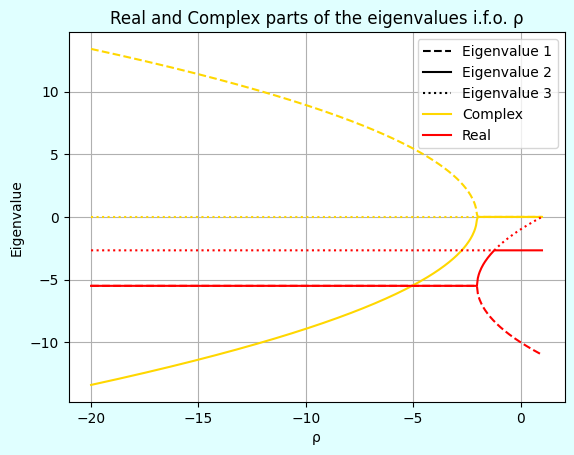

In [8]:
p = np.linspace(-20,1,500)
show_eigvals_ifo_p(p)

When letting *get_roots* loose on our coefficients where $\rho < 1$, we receive 3 negative eigenvalues for all values of $\rho$ that satisfy this condition, implying that we have a stable equilibrium at $(0,0,0)$.

Now we will try and visualise how one converges to this stable equilibrium, starting from a certain starting point.

In [9]:
def get_change(X,Y,Z,p):
    """
    get_change will, when given a value for X,Y and Z and a value for p,
    return the change vector according to the Lorenz equations
    """
    return (sig*(Y-X),X*(p-Z)-Y,X*Y-b*Z)

In [10]:
def get_next_point(X,Y,Z,p):
    """
    get_next_point will, when given a value for X,Y and Z and a value for p,
    return the next point being the point where one will end when following
    the change_vector at X,Y,Zfor dt amount of time
    """
    return (X + dt*get_change(X,Y,Z,p)[0],Y + dt*get_change(X,Y,Z,p)[1],Z + dt*get_change(X,Y,Z,p)[2])

In [11]:
def get_trajectory(Xstart,Ystart,Zstart,p):
    """
    get_trajectory will, when given an initial value for X,Y and Z and a value
    for p, return 3 sequences containing subsequential points in each dimension
    """
    X0,Y0,Z0 = Xstart,Ystart,Zstart
    trajectory_x,trajectory_y,trajectory_z = [X0],[Y0],[Z0]
    for i in range(steps):
        X0,Y0,Z0 = get_next_point(X0,Y0,Z0,p)
        trajectory_x.append(X0)
        trajectory_y.append(Y0)
        trajectory_z.append(Z0)
    return trajectory_x,trajectory_y,trajectory_z

In [12]:
def get_multiple_trajectories(Xgrid,Ygrid,Zgrid,p):
    """
    get_multiple_trajectories will, when given multiple values for X,Y and Z
    (i.e. multiple starting points) and a singular value for p,
    return 3 sequences of the appended trajectories in each dimension
    for each starting point
    """
    Xarray,Yarray,Zarray = Xgrid.flatten(),Ygrid.flatten(),Zgrid.flatten()      #By flattening the arrays, we simplify their dimensions and thus we simplify the problem
    trajectories_x,trajectories_y,trajectories_z = [],[],[]
    for k in range(len(Xarray)):
        traj_of_start_point_k = get_trajectory(Xarray[k],Yarray[k],Zarray[k],p)

        trajectories_x += traj_of_start_point_k[0]
        trajectories_y += traj_of_start_point_k[1]
        trajectories_z += traj_of_start_point_k[2]

    return trajectories_x,trajectories_y,trajectories_z

In [13]:
def plot_assist(array):
    """
    When using matplotlib's plot-function with multiple trajectories, the end/
    begin points of each trajectory will be connected with another trajectory
    characterised by big jumps in the subsequent points in the trajectory.
    These connections are unwanted, and so the function plot_assist will, when
    given an array of subsequent positions in one dimension, return an array
    in which the big differences have been neutralised via np.nan.
    """
    if len(array) == 0:
        return array

    differences = np.append(np.diff(array),0)
    idx_of_jumps = np.abs(differences) > epsilon
    array[idx_of_jumps] = np.nan
    return array

In [14]:
def get_quiver(Xg,Yg,Zg,p):
    """
    get_quiver will, when given X, Y and Z value(s) and a value for p,
    return the associated argument for matplotlib's quiver method
    """
    Xprime,Yprime,Zprime = get_change(Xg,Yg,Zg,p)
    return Xg,Yg,Zg,Xprime,Yprime,Zprime

In [15]:
def show_multiple_trajectories(Xgrid,Ygrid,Zgrid,p,ax1,azi=-110):
    """
    show_multiple_trajectories will, when given multiple initial values for
    X,Y and Z(i.e. multiple starting points) and a singular value for p,
    plot the multiple trajectories alongside the stable equilibrium at (0,0,0)
    """
    trajsx,trajsy,trajsz = get_multiple_trajectories(Xgrid,Ygrid,Zgrid,p)

    ax1.plot(plot_assist(np.array(trajsx)),plot_assist(np.array(trajsy)),plot_assist(np.array(trajsz)),color = 'black',linewidth = 0.5,label = 'Trajectory')
    ax1.scatter(X,Y,Z,color = 'blue',label = 'Starting points',s=30)
    ax1.scatter(0,0,0,color = 'green',label = 'Stable Equilibrium',s=30)

    #arrows
    begin_points_idx = (np.append(np.array([True]),np.isnan(plot_assist(np.array(trajsx)))))[:-1]   #We don't want the arrows where the jump is, so we replace each value by the previous, and add a True in the beginning for the first point
    ax1.quiver(*get_quiver(plot_assist(np.array(trajsx))[begin_points_idx],plot_assist(np.array(trajsy))[begin_points_idx],plot_assist(np.array(trajsz))[begin_points_idx],p),pivot='tail',arrow_length_ratio=0.5,color = 'red',normalize=True,length = 0.1,label = 'Change Vector')
    #additional information/decoration to the plot
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.view_init(azim=azi)
    plt.legend()
    return

We can now visualize the behaviour of the system via multiple starting points.

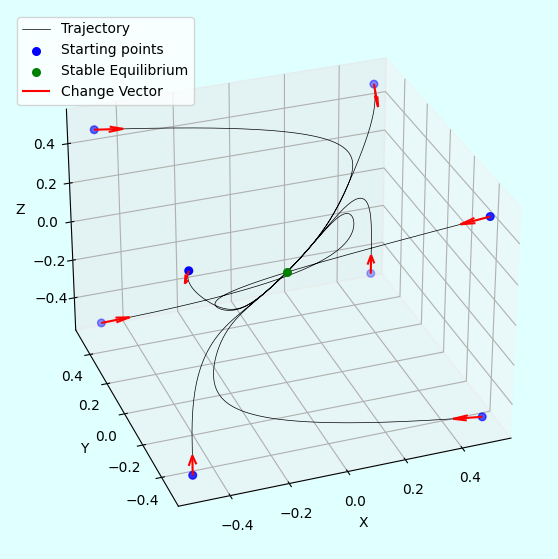

In [16]:
#defining parameters for our functions
dt = 0.01
steps = 5000
epsilon = 0.1
p = 0.5 #an initial value for p which satisfies the condition p<1

x,y,z = np.linspace(-0.5,0.5,2),np.linspace(-0.5,0.5,2),np.linspace(-0.5,0.5,2)
X,Y,Z = np.meshgrid(x,y,z)
fig = plt.figure(figsize = (7,7))
fig.set_facecolor('lightcyan')
ax = fig.add_subplot(projection='3d')
ax.set_facecolor('lightcyan')

show_multiple_trajectories(X,Y,Z,p,ax,azi=-110)

We can see that for every starting point, the trajectory converges to the singular point of equilibrium $(0,0,0)$, implying that it's **stable**. This is precisely what we expected from the analysis of the Jacobian matrix, which had given us only negative eigenvalues for said point of equilibrium.

In [17]:
def show_trajectory(X,Y,Z,p,azi=-110):
    """
    show_trajectory is analogous to show_multiple_trajectories, but plots only
    one trajectory(as the name suggests)
    """
    fig = plt.figure(figsize = (7,7))
    fig.set_facecolor('lightcyan')
    ax = fig.add_subplot(projection='3d')
    ax.set_facecolor('lightcyan')
    ax.scatter(X,Y,Z,color = 'blue',label = 'Starting Point')
    ax.scatter(0,0,0,color = 'green', label = 'Stable Equilibrium')
    ax.plot(*get_trajectory(X,Y,Z,p),color = 'black',linewidth = 0.5,label = 'Trajectory')

    ax.quiver(*get_quiver(X,Y,Z,p),normalize=True,length=0.3,color='red',arrow_length_ratio=0.5,pivot='tail',label= 'Change Vector')
    ax.view_init(azim=azi)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(-1.5,1.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    return

With the latest defined function, we can construct a widget, which lets you choose a starting point, a value for $\rho$ and an azimuth and will subsequently show its trajectory with your preferred parameters.

In [18]:
ipywidgets.interact(show_trajectory,X = (-1,1,0.01),Y = (-1,1,0.01), Z = (-1,1,0.01), azi = (-180,180),p = (-0.5,0.5,0.1))

interactive(children=(FloatSlider(value=0.0, description='X', max=1.0, min=-1.0, step=0.01), FloatSlider(value…

<function __main__.show_trajectory(X, Y, Z, p, azi=-110)>

#Question 2 - Equilibria where $\rho > 1$

Our initial analysis stated that for $\rho > 1$, we have three real points of equilibria. Here we will, analogous to the method in Question 1, review the stability of these points of equilibria via the eigenvalues of the Jacobian matrix. The associated coefficients of the characteristic polynomial for each point has already been mentioned in Question 1. But since our $\rho > 1$ here, the additional coefficients become relevant.

In [19]:
def get_coefficients_eq1(p):
    point1 = (np.full((np.shape(p)),0),np.full((np.shape(p)),0),np.full((np.shape(p)),0))
    X,Y,Z = point1
    return [1,sig+b+1,b+X**2+sig*(Z - p + b + 1), sig*(b*(Z - p + 1) + X**2 + X*Y)]

def get_coefficients_eq2(p):
    point2 = (np.sqrt(b*(p-1)),np.sqrt(b*(p-1)),p-1)
    X,Y,Z = point2                                                                                      #!Complex solution for rho smaller than 1!
    return [1,sig+b+1,b+X**2+sig*(Z - p + b + 1), sig*(b*(Z - p + 1) + X**2 + X*Y)]

def get_coefficients_eq3(p):
    point3 = (-np.sqrt(b*(p-1)),-np.sqrt(b*(p-1)),p-1)
    X,Y,Z = point3                                                                                      #!Complex solution for rho smaller than 1!
    return [1,sig+b+1,b+X**2+sig*(Z - p + b + 1), sig*(b*(Z - p + 1) + X**2 + X*Y)]

Suppose $\rho = 2$, our points of equilibria become: $(0,0,0),(\sqrt{\beta},\sqrt{\beta},1),(-\sqrt{\beta},-\sqrt{\beta},1)$. (See initial analysis)

In [20]:
p = 2
print(f'Eigenvalues associated with equilibrium 1: {get_roots(get_coefficients_eq1(p))}')

print(f'Eigenvalues associated with equilibrium 2: {get_roots(get_coefficients_eq2(p))}')

print(f'Eigenvalues associated with equilibrium 3: {get_roots(get_coefficients_eq3(p))}')

Eigenvalues associated with equilibrium 1: [array([-11.84428877,  -2.66666667,   0.84428877])]
Eigenvalues associated with equilibrium 2: [array([-11.24223995+0.j        ,  -1.21221336+1.80957228j,
        -1.21221336-1.80957228j])]
Eigenvalues associated with equilibrium 3: [array([-11.24223995+0.j        ,  -1.21221336+1.80957228j,
        -1.21221336-1.80957228j])]


One can see that our initial stable point of equilibrium $(0,0,0)$ is a saddle point for $\rho > 1$, this is because the Jacobian eigenvalues for this point are positive for 1 eigenvalue, and negative for 2, i.e. $(0,0,0)$ is a stable node in a 2D subspace(associated with the negative eigenvalues) of our 3D space, but unstable in a 1D subspace(associated with the positive eigenvalue) which is, per definition, a saddle-point. We can also notice that our 2 additional points are indeed relevant since they have a real part, in fact, the eigenvalues for both points are **identical**. We observe one real eigenvalue and two complex eigenvalues. Again, the real eigenvalue is negative, implying that both our points are attractive in a 1D subspace of our 3D space. Our complex eigenvalues have **negative** real parts, implying that we get a stable spiral in a 2D subspace(which is not necessarily the same for both equilibria) associated with these eigenvalues.

Now we will visualise the eigenvalues in function of $\rho$ once again.

In [21]:
def show_eigvals_ifo_p2(p,equi,ax):
    """
    show_eigvals_ifo_p2 is analogous to show_eigvals_ifo_p, aside from the fact
    that it takes two extra arguments, in which we can specify for which point of
    equilibrium we want the eigenvalues-plot and specify the axis on which
    the function must plot on
    """
    if equi == 0:
        eigvals = get_roots(extend_coefficients(get_coefficients_eq1(p)))
        ax.set_title('Eigenvalues for (0,0,0)')
    elif equi == 1:
        eigvals = get_roots(extend_coefficients(get_coefficients_eq2(p)))
        ax.set_title('Eigenvalues for (√β(ρ−1),√β(ρ−1),ρ−1)')
    else:
        eigvals = get_roots(extend_coefficients(get_coefficients_eq3(p)))
        ax.set_title('Eigenvalues for (-√β(ρ−1),-√β(ρ−1),ρ−1)')

    complex_parts = np.array(get_real_and_complex_eigvals(eigvals)[1])
    real_parts = np.array(get_real_and_complex_eigvals(eigvals)[0])

    linestyles = ['--','solid','dotted']
    for i in range(3):
        ax.plot(p,complex_parts[:,i],linestyle = linestyles[i],color = 'gold')
        ax.plot(p,real_parts[:,i],linestyle = linestyles[i],color = 'red')
    #Further decorations/information to the plot
    ax.grid(True)
    ax.plot(1,1,color = 'black',label = 'Eigenvalue 1',linestyle = '--')
    ax.plot(1,1,color = 'black',label = 'Eigenvalue 2')
    ax.plot(1,1,color = 'black',label = 'Eigenvalue 3',linestyle = 'dotted')
    ax.plot(1,1,color = 'gold',label = 'Complex')
    ax.plot(1,1,color = 'red',label = 'Real')
    ax.set_ylabel('Eigenvalue')
    ax.set_xlabel('ρ')
    ax.legend()
    return

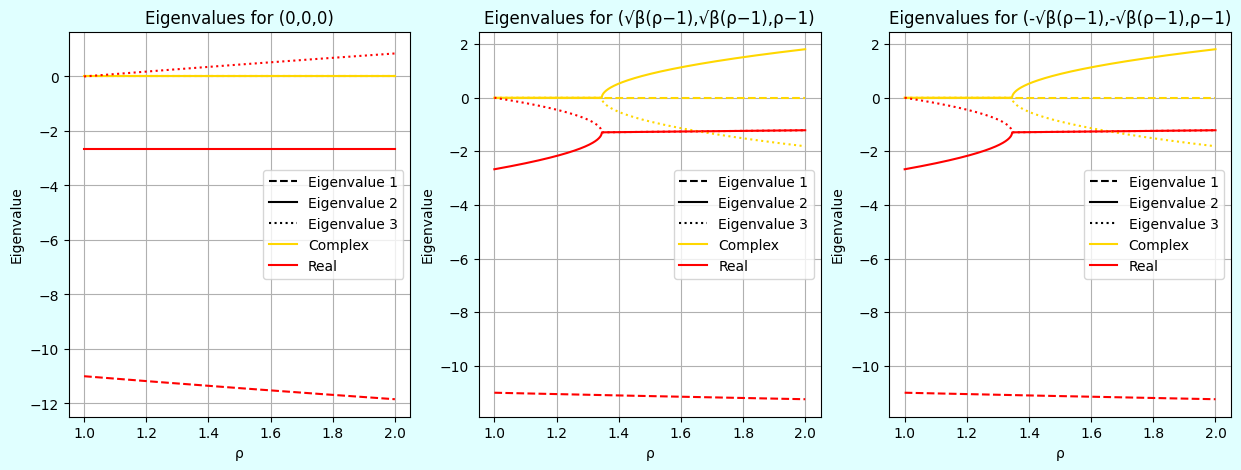

In [22]:
p = np.linspace(1,2,1000)
fig,axs = plt.subplots(1,3,figsize=(15,5))
fig.set_facecolor('lightcyan')
show_eigvals_ifo_p2(p,0,axs[0])
show_eigvals_ifo_p2(p,1,axs[1])
show_eigvals_ifo_p2(p,2,axs[2])

And so we can observe that when $\rho$ passes 1, an eigenvalue for $(0,0,0)$ becomes positive. Generally speaking, when we go from one fixed point of equilibrium to three, the system undergoes a **pitchfork** bifurcation. Earlier we noticed that the eigenvalues for equilibrium 2 and 3 were identical for a singular value for $\rho$. Now we can see that the evolution of their eigenvalues and thus their stability is also **identical**, which is exactly what we'd expect from a pitchfork bifurcation.

We will now try and visualise the behaviour of the system where $\rho > 1$ (through a widget) and observe if our analysis for a singular value of $\rho$ where $\rho>1$ was correct.

In [23]:
def show_trajectory2(X,Y,Z,p,azi=-110):
    """
    show_trajectory2 is almost an exact copy of show_trajectory, but here we
    account for the extra points of equilibria
    """
    fig = plt.figure(figsize = (7,7))
    fig.set_facecolor('lightcyan')
    ax = fig.add_subplot(projection='3d')
    ax.set_facecolor('lightcyan')
    ax.scatter(X,Y,Z,color = 'blue',label = 'Starting Point',s = 30)
    ax.scatter(0,0,0,color = 'purple', label = 'Saddle-point',s = 30)
    ax.scatter(np.sqrt(b*(p-1)),np.sqrt(b*(p-1)),p-1,color = 'gold',s = 30)
    ax.scatter(-np.sqrt(b*(p-1)),-np.sqrt(b*(p-1)),p-1,color = 'gold',label = 'Stable node',s = 30)
    ax.plot(*get_trajectory(X,Y,Z,p),color = 'black',label = 'Trajectory',linewidth = 0.3)

    ax.quiver(*get_quiver(X,Y,Z,p),normalize=True,length=2,color='red',arrow_length_ratio=0.5,pivot='tail',label= 'Change Vector')
    ax.view_init(elev=5,azim=azi)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    return

In [24]:
ipywidgets.interact(show_trajectory2,X = (-10,10,0.1),Y = (-10,10,0.1), Z = (-10,10,0.1), azi = (-180,180),p = (2,10,0.1))

interactive(children=(FloatSlider(value=0.0, description='X', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

<function __main__.show_trajectory2(X, Y, Z, p, azi=-110)>

And indeed, we see that equilibrium 2 and 3 are stable spirals in a certain plane, which is determined by the eigenvalues of the Jacobian matrix, i.e. the eigenspaces. Another interesting phenomenon is that the magnitude of attraction of the stable spirals gets weaker as $\rho$ gets larger, this visually manifests itself as the trajectory that is 'falling into the equilibrium' slower.

#Question 3 - Analysis of increasing $\rho$

We can again plot the evolution of the eigenvalues for increasing $\rho$ (till $\rho = 28$).

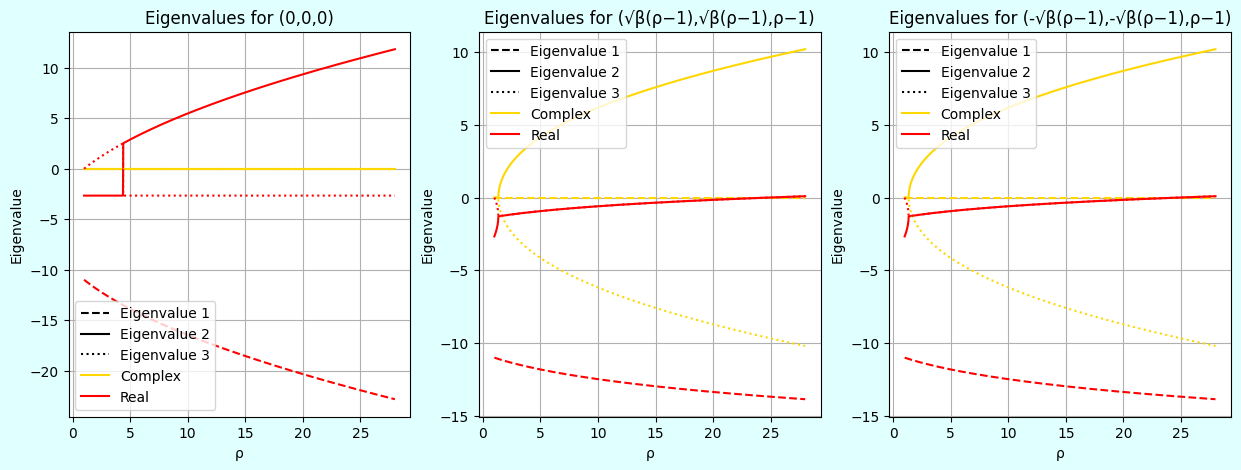

In [25]:
p = np.linspace(1,28,1000)
fig,axs = plt.subplots(1,3,figsize=(15,5))
fig.set_facecolor('lightcyan')
show_eigvals_ifo_p2(p,0,axs[0])
show_eigvals_ifo_p2(p,1,axs[1])
show_eigvals_ifo_p2(p,2,axs[2])

A couple of interesting things occur:

For the first point of equilibrium $(0,0,0)$:
At $\rho \approx 4$, two eigenvalues seemingly swap places, implying that the $(0,0,0)$ equilibrium becomes unstable in a 1D subspace in which it was previously stable, and vice versa. Another explanation for this strange phenomenon would be a quirk in our methods in solving for the eigenvalues, which seems more likely since the swap happens in a very discontinuous manner.

For the second point of equilibrium $(\sqrt{\beta(\rho - 1)},\sqrt{\beta(\rho - 1)},\rho - 1)$: We see that eigenvalue 2 and 3 were intially negative, but become positive at $\rho \approx 25$. When the real part of a complex eigenvalue passes through zero (negative to positive), a **Hopf bifurcation** occurs.

For the third and final point of equilibrium $(-\sqrt{\beta(\rho - 1)},-\sqrt{\beta(\rho - 1)},\rho - 1)$: We can see that the evolution of eigenvalues of equilibrium point 2 and 3 still allign perfectly, hence the same conclusions apply.

Now we will try to visualize the stability of our equilibria in each dimension, i.e. we will plot $(\rho,X)$,$(\rho,Y)$ and $(\rho,Z)$. The positions of our equilibria are easily described by: $(0,0,0),(\sqrt{\beta(\rho - 1)},\sqrt{\beta(\rho - 1)},\rho - 1)$ and $(-\sqrt{\beta(\rho - 1)},-\sqrt{\beta(\rho - 1)},\rho - 1)$. The stability is given by the sign of the real parts of the eigenvalues, where following situations can occur:

1. All real parts are negative $\implies$ Stable equilibrium
2. Some real parts are negative, and others are positive $\implies$ Saddle-point $\implies$ Unstable equilibrium
3. All real parts are positive $\implies$ Unstable equilibrium

In [26]:
def get_equilibria1(p):
    """
    get_equilibria1 will return the X-,Y- and Z-value of the first equilibrium,
    this is always (0,0,0), but we define it anyway for formality and if we need
    the equilibrium in a certain format that matches p's format
    """
    return 0*p,0*p,0*p

In [27]:
def get_equilibria2(p):
    """
    get_equilibria2 will return the X-,Y- and Z-value of the 2nd equilibrium,
    when given a value for p
    """
    return np.sqrt(b*(p-1)),np.sqrt(b*(p-1)),p-1

In [28]:
def get_equilibria3(p):
    """
    get_equilibria3 will return the X-,Y- and Z-value of the 3rd equilibrium,
    when given a value for p
    """
    return -np.sqrt(b*(p-1)),-np.sqrt(b*(p-1)),p-1

In [29]:
def get_unstable_and_stable_idx(real_eigvals):
    """
    get_unstable_and_stable_idx will, when given array-like sequence of real
    eigenvalues, return 2 corresponding array-like sequences with boolean values
    which indicate the stability of a certain point of equilibrium
    """
    unstable_idx = []
    stable_idx = []
    for ele in real_eigvals:
        if any(ele>0):
            unstable_idx.append(True)
            stable_idx.append(False)
        else:
            stable_idx.append(True)
            unstable_idx.append(False)
    return stable_idx,unstable_idx

In [30]:
def show_equilibria_1dim(p,ax,dim_int):
    """
    show_equilibria_1dim will, when given a value for p, an axis to project on
    and a dimensional integer(0=x-dimension, 1=y-dimension, 2=z-dimension),
    plot on the given axis the evolution of the points of equilibria as p
    changes
    """
    stable_idx1,unstable_idx1 = get_unstable_and_stable_idx(get_real_and_complex_eigvals(get_roots(extend_coefficients(get_coefficients_eq1(p))))[0])
    stable_idx2,unstable_idx2 = get_unstable_and_stable_idx(get_real_and_complex_eigvals(get_roots(extend_coefficients(get_coefficients_eq2(p))))[0])
    stable_idx3,unstable_idx3 = get_unstable_and_stable_idx(get_real_and_complex_eigvals(get_roots(extend_coefficients(get_coefficients_eq3(p))))[0])

    ax.plot(p[stable_idx1],get_equilibria1(p)[dim_int][stable_idx1],color = 'green',label = 'Stable')
    ax.plot(p[unstable_idx1],get_equilibria1(p)[dim_int][unstable_idx1],color = 'red',linestyle = '--',label = 'Unstable')
    ax.plot(p[stable_idx2],get_equilibria2(p)[dim_int][stable_idx2],color = 'green')
    ax.plot(p[unstable_idx2],get_equilibria2(p)[dim_int][unstable_idx2],color = 'red',linestyle = '--')
    ax.plot(p[stable_idx3],get_equilibria3(p)[dim_int][stable_idx3],color = 'green')
    ax.plot(p[unstable_idx3],get_equilibria3(p)[dim_int][unstable_idx3],color = 'red',linestyle = '--')
    ax.scatter(1,0,color ='purple',label = 'Pitchfork Bifurcation')
    ax.scatter(p[unstable_idx2][0],get_equilibria2(p)[dim_int][unstable_idx2][0],color = 'magenta',label = 'Hopf Bifurcation')
    ax.scatter(p[unstable_idx3][0],get_equilibria3(p)[dim_int][unstable_idx3][0],color = 'magenta')
    #Further decoration/information to the plot
    dim_list = ['X','Y','Z']
    ax.set_ylim(-30,30)
    ax.set_title(f'(ρ,{dim_list[dim_int]})')
    ax.set_xlabel('ρ')
    ax.set_ylabel(f'{dim_list[dim_int]} value of equilibria')
    ax.legend()
    ax.grid(True)
    return

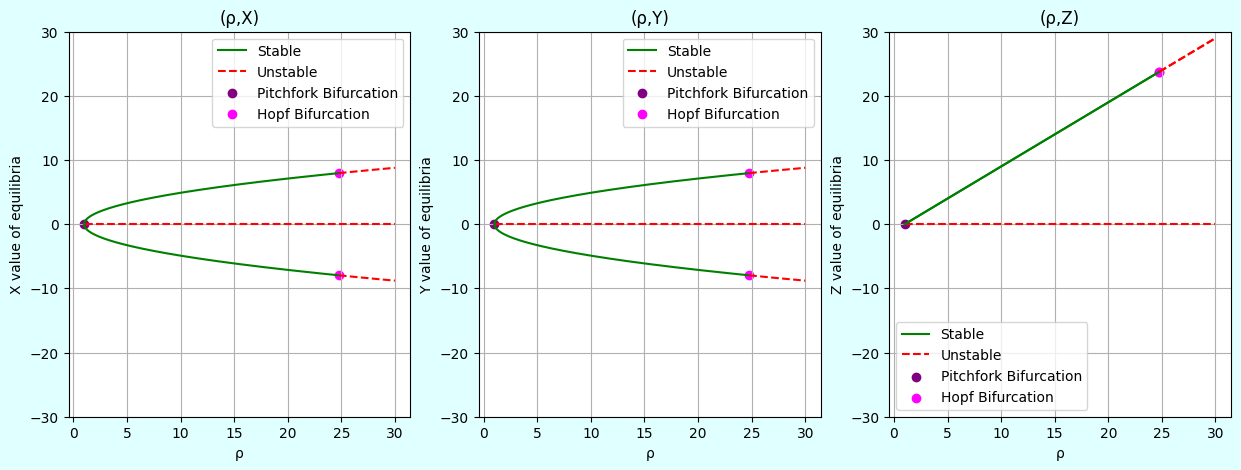

In [31]:
p = np.linspace(1,30,500)
fig,axs = plt.subplots(1,3,figsize=(15,5))
fig.set_facecolor('lightcyan')

show_equilibria_1dim(p,axs[0],0)
show_equilibria_1dim(p,axs[1],1)
show_equilibria_1dim(p,axs[2],2)

This graph, once again, reveals interesting information; following our initial general assumption, we indeed have a pitchfork bifurcation at $\rho = 1$, since we know that for $\rho < 1$, there's only one stable equilibrium at $(0,0,0)$. We can also see that **all** our equilibria become unstable at $\rho \approx 25$. According to our analysis of the eigenvalues, we are dealing with a **Hopf bifurcation** at said value. When a Hopf bifurcation occurs, we lose the stability of certain equilibria. One can indeed observe that we lose the stability of both equilibrium 2 and 3, verifying the occurence of the Hopf bifurcation.

We'll once again construct a widget, where the chaotic behaviour of the system will become visible for larger values of $\rho$.

In [32]:
steps = 10000 #increase the steps so we minimise seemingly uncomplete trajectories

In [33]:
ipywidgets.interact(show_trajectory2,X = (-10,10,0.1),Y = (-10,10,0.1), Z = (-10,10,0.1), azi = (-180,180),p = (2,28,0.1))

interactive(children=(FloatSlider(value=0.0, description='X', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

<function __main__.show_trajectory2(X, Y, Z, p, azi=-110)>

#Question 4 - Time evolution

We are interested in the evolution of a trajectory as time progresses around the value where $\rho = 24.06$. We'll plot our trajectory in each dimension as functions of time for two values of $\rho$: $\rho=22.05$ and $\rho = 25$.

In [34]:
def show_1d_trajectory_ifo_t(xStart,yStart,zStart,p,dim_int,ax):
    """
    show_1d_trajectory_ifo_t will, when given an initial X-,Y- and Z-value,
    a value for p, a dimensional integer(where 0 = x-dimension, 1 = y-dimension,
    2 = z-dimension) and an axis to project on, plot the trajectory, associated
    with the given value for p and the intitial value for X,Y and Z, in the
    dimension given by dim_int as a function of time
    """
    eq1x,eq2x,eq3x = get_equilibria1(p)[dim_int],get_equilibria2(p)[dim_int],get_equilibria3(p)[dim_int]

    one_d_traj = get_trajectory(xStart,yStart,zStart,p)[dim_int]
    t = np.linspace(0,100,len(one_d_traj))
    dim_list_var = [xStart,yStart,zStart]
    ax.plot(t,one_d_traj,color = 'black',label = 'Trajectory')
    if eq3x == eq2x:
        ax.plot([0,100],[eq3x,eq3x],color = 'blueviolet',linestyle = '--', label = 'Equilibrium 2 and 3')
    else:
        ax.plot([0,100],[eq3x,eq3x],color = 'blueviolet',linestyle = '--',label = 'Equilibrium 3')
        ax.plot([0,100],[eq2x,eq2x],color = 'blueviolet',linestyle = '-.',label = 'Equilibrium 2')
    ax.plot([0,100],[eq1x,eq1x],color = 'blueviolet',label = 'Equilibrium 1')
    ax.scatter(0,dim_list_var[dim_int],color = 'blue',label ='Starting point',s=40)
    ax.legend()
    ax.grid(True)
    dim_list_str = ['X','Y','Z']
    ax.set_title(f'{dim_list_str[dim_int]} in function of t with ρ = {p}')
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{dim_list_str[dim_int]}')
    ax.set_ylim(-50,50)
    return

In [35]:
p1 = 22.05
p2 = 25
steps = 50000
dt = 0.001
Xstart,Ystart,Zstart = 1,1,1

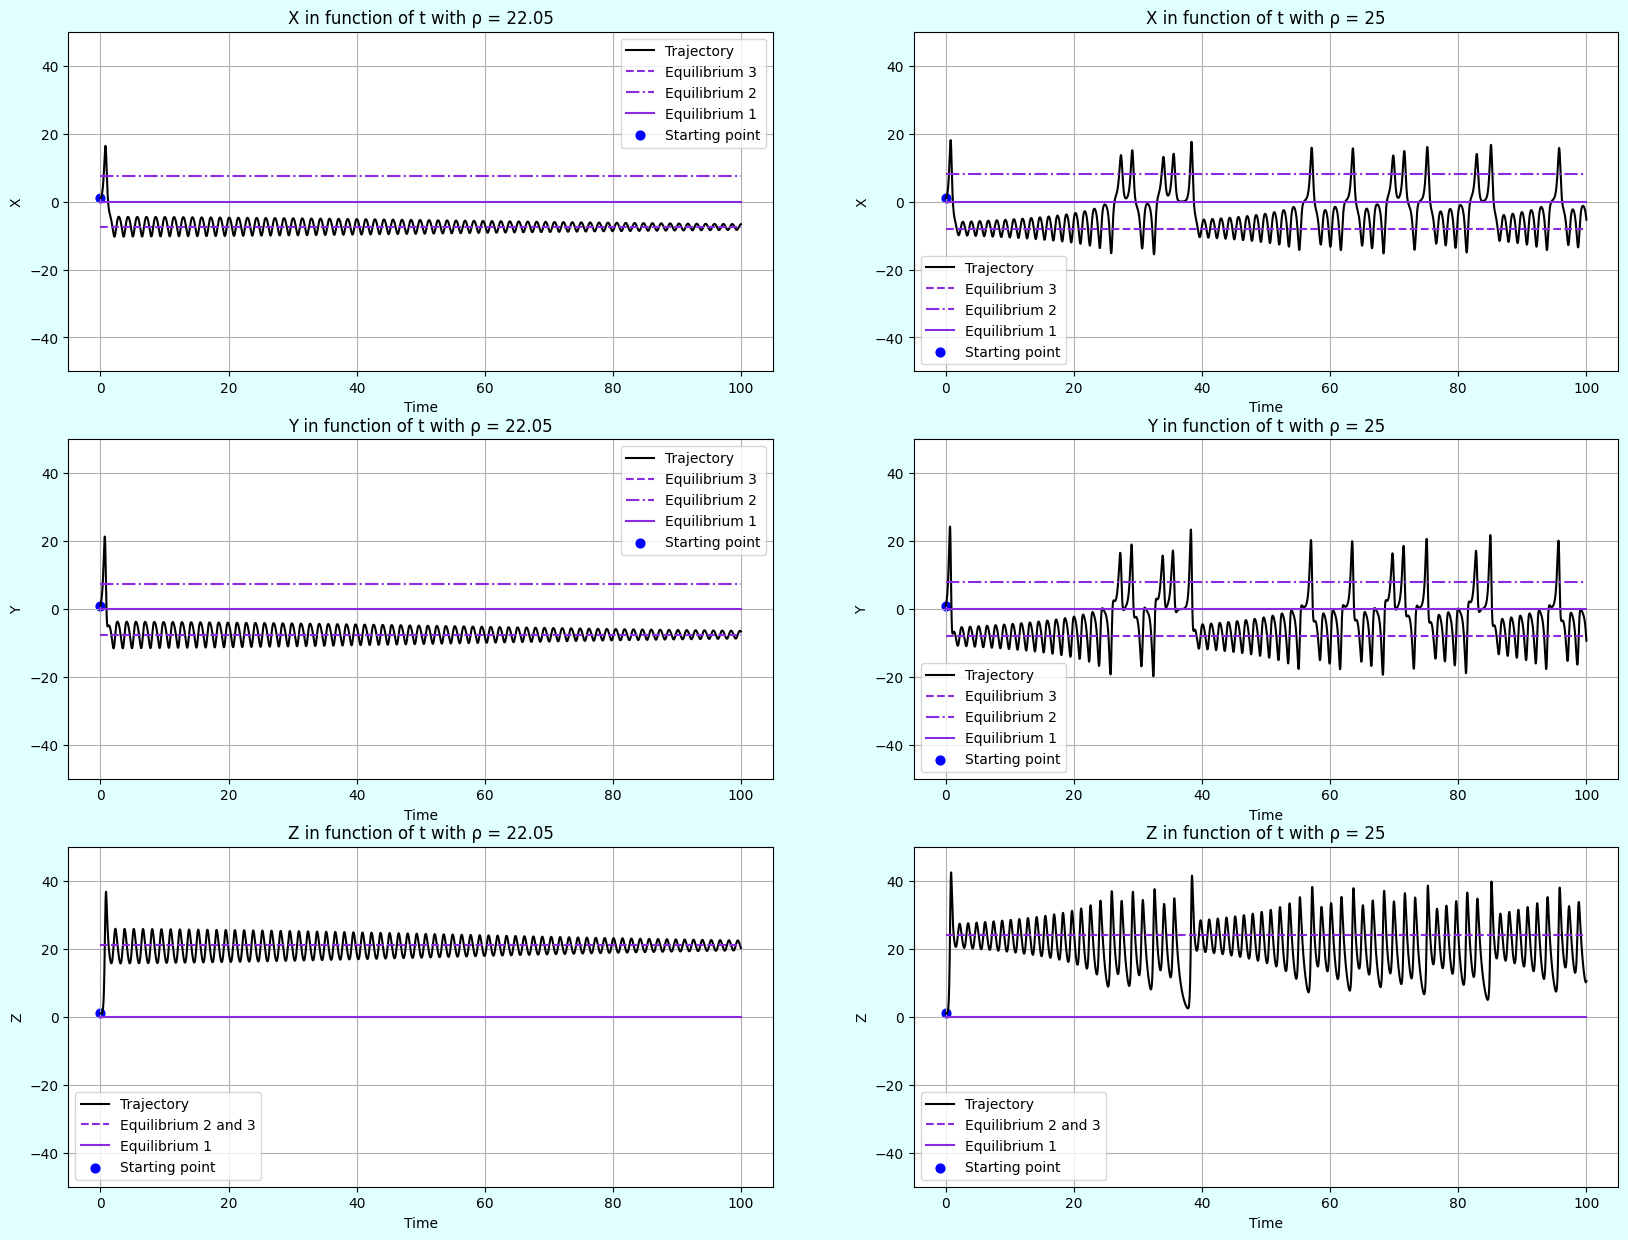

In [36]:
fig,axs = plt.subplots(3,2,figsize=(20,15))
fig.set_facecolor('lightcyan')

show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p1,0,axs[0,0])
show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p2,0,axs[0,1])
show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p1,1,axs[1,0])
show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p2,1,axs[1,1])
show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p1,2,axs[2,0])
show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p2,2,axs[2,1])

From our previous analysis, we know that for $\rho$ smaller than $\approx 25$, equilibrium points 2 and 3 are stable equilibria. In the plot above we can indeed observe that for $\rho = 22.05$, which is smaller than $25$, our point converges to either equilibria 2 or 3, depending on the starting position, given enough time. For $\rho = 25$ the system behaves in a chaotic manner; the trajectory switches between equilibria 2 and 3 indefinitely, yet, the trajectory never visits the same point twice. According to our previous analysis, for these larger values of $\rho$, equilibria 2 and 3 become unstable. Which is something we can clearly see in all 3 plots for $\rho = 25$; suppose we let a particle loose at our starting point, it will intially be slingshotted close to an equilibrium(either 2 or 3), but since it's unstable, the distance between the equilibrium and the particle will become larger and larger(visible in those 3 plots), until it gets slingshotted close to the other equilibrium, where the cycle repeats in a different manner. A nice way to view this phenomenon is as if the points of equilibria are playing an endless game of ping-pong with the particle.

#Question 5 - The Chaotic Attractor

Initially we will plot our trajectory in the $ZY$-plane for a certain period of time.

In [37]:
p = 24.06
Xstart,Ystart,Zstart = 1,2,3
dt = 0.001
steps = 45000

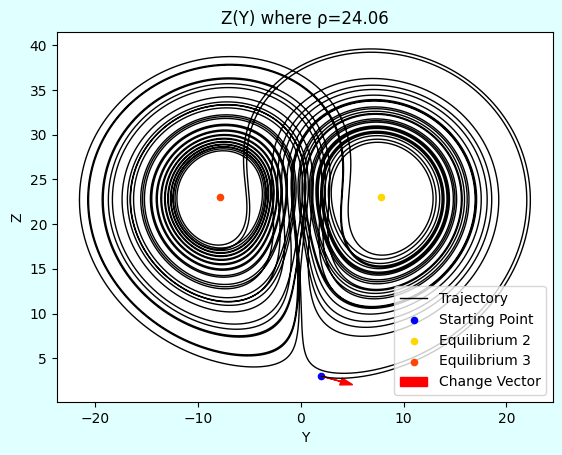

In [38]:
fig,ax = plt.subplots()
fig.set_facecolor('lightcyan')
trajx,trajy,trajz = get_trajectory(Xstart,Ystart,Zstart,p)
ax.plot(trajy,trajz,color = 'black',linewidth = 1,label = 'Trajectory')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.scatter(Ystart,Zstart,color = 'blue',s = 20,label = 'Starting Point')
ax.scatter(get_equilibria2(p)[1],get_equilibria2(p)[2],color = 'gold',label = 'Equilibrium 2',s=20)
ax.scatter(get_equilibria3(p)[1],get_equilibria3(p)[2],color = 'orangered',label = 'Equilibrium 3',s=20)
ax.arrow(Ystart,Zstart,0.1*get_change(Xstart,Ystart,Zstart,p)[1],0.1*get_change(Xstart,Ystart,Zstart,p)[2],color = 'red',head_width = 0.8,label = 'Change Vector')
ax.set_title(f'Z(Y) where ρ={p}')
ax.legend()

We can see that the particle get slingshotted between the two wings of the attractor, and we want to find out just *when* the particle goes from one wing to another. After giving this issue some thought, one might come to the conclusion that the distance to the equilibrium is *the* factor that decides if a particle will switch wings or not. And so we look for the critical distance(we'll choose the $Z$ value when the particle is right above either point of equilibrium) where the particle will switch wings.

In [39]:
def get_critical_z_value(trajz,trajy,p):
    """
    get_critical_z_values will, when given a trajectory in the z-dimension,
    one in the y-dimension and a value for p, return every z value for which the
    particle has switched wings after achieving said value
    """
    reversed_ztraj = trajz[::-1]
    reversed_ytraj = trajy[::-1]
    critical_z_values = []
    particle_in_right_wing = True
    particle_in_left_wing = False
    for i in range(len(reversed_ztraj)):
        if reversed_ytraj[i] < get_equilibria3(p)[1] and particle_in_right_wing == True:
            particle_in_left_wing = True
            particle_in_right_wing = False
            critical_z_values.append(reversed_ztraj[i])
        elif reversed_ytraj[i] > get_equilibria2(p)[1] and particle_in_left_wing == True:
            particle_in_left_wing = False
            particle_in_right_wing = True
            critical_z_values.append(reversed_ztraj[i])
    return min(critical_z_values[5:]) #The first values can be anomalous since the
    #system hasn't 'settled' in the chaotic attractor

The general strategy to find this critical $Z$ value goes as follows: when following a particle's trajectory there is no way of knowing when it will switch wings. That's why the function reverses the trajectory so we switch wings first, and then takes note of the subsequent maximal $Z$-value(it's not really the maximal $Z$-value we take note of, but the $Z$-value that the particle has when it is 'above' an equilibrium, speaking in terms of the $Z(Y)$ figure). Only for steps->$∞$ will we get the actual critical $Z$-value, but we should get a nice approximation for a large number of steps.

In [40]:
steps = 100000
trajx,trajy,trajz = get_trajectory(Xstart,Ystart,Zstart,p)

get_critical_z_value(trajz,trajy,p)

33.77605124310537

In [41]:
steps = 1000000
trajx,trajy,trajz = get_trajectory(Xstart,Ystart,Zstart,p)

get_critical_z_value(trajz,trajy,p)

33.75006502913424

We see that for more steps taken, we converge to the actual critical $Z$-value.
Our hypothesis states that after a particle goes beyond this critical value, it will switch wings. For verification, we will animate a particle in the attractor.

In [42]:
critical_z = get_critical_z_value(trajz,trajy,p)

In [43]:
p = 24.06
Xstart,Ystart,Zstart = 1,8,10 #We choose the starting point in such a manner
#that the effect is clearly visible
dt = 0.001
frames = 500
speed = 20
steps = speed*frames

In [44]:
trajx,trajy,trajz = get_trajectory(Xstart,Ystart,Zstart,p)
fig, ax= plt.subplots()
fig.set_facecolor('lightcyan')
fig.suptitle(f'Trajectory of a particle where ρ= {p}')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.scatter(Ystart,Zstart,color = 'blue',s = 20,label = 'Starting Point')
ax.scatter(get_equilibria2(p)[1],get_equilibria2(p)[2],color = 'gold',label = 'Equilibrium 2',s=20)
ax.scatter(get_equilibria3(p)[1],get_equilibria3(p)[2],color = 'orangered',label = 'Equilibrium 3',s=20)
ax.plot([-20,20],[critical_z,critical_z],linestyle = '--',color = 'red')
def animate(frame):
    ax.plot(trajy[(speed*frame)-20:speed*frame],trajz[(speed*frame)-20:speed*frame],color = 'black',linewidth = 1,label = 'Trajectory')
anim = FuncAnimation(fig,animate,frames=frames,interval=50)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

As predicted, every time our particle goes beyond the red, striped line, which represents the critical $Z$-value, it switches wings.

#Question 6 - Predicting $Z_{n+1}$ via $Z_n$

Suppose we let a particle loose in the Lorenz system where $\rho = 24.06$. Lorenz hypothesised that if one knows a local maximum in the $Z$-values of the particle's trajectory $Z_n$, one could predict the subsequent local maximum $Z_{n+1}$. First we'll plot $Z(t)$ as we did in Question 4.

In [45]:
Xstart, Ystart, Zstart = 1,2,3
p = 24.06
steps = 100000
dt = 0.001

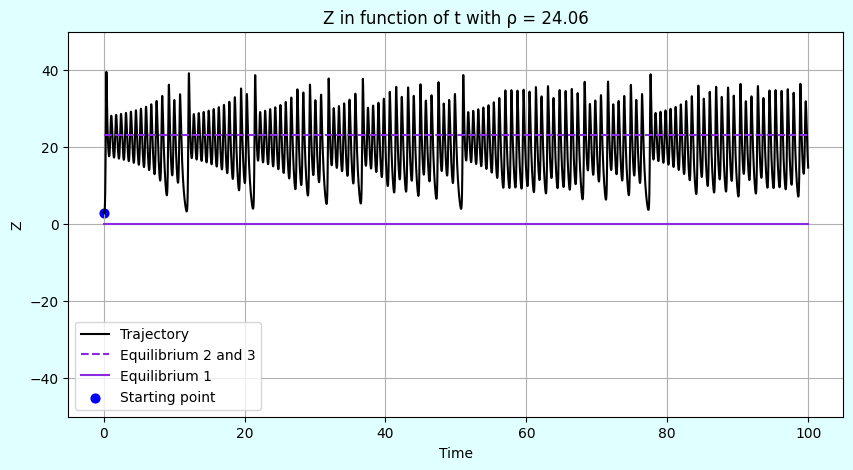

In [46]:
fig,ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('lightcyan')

show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p,2,ax)

All we need to do is get the sequence of subsequent $Z$-values, and filter out the non-maximal values.

In [47]:
def get_Zmax(trajz):
    """
    get_Zmax will, when given an array-like sequence of subsequent values,
    return a sequence of maximal values encountered in the input sequence
    """
    Z_max = []
    for i in range(1,len(trajz)-1):
        if trajz[i-1]<trajz[i] and trajz[i+1]<trajz[i]:
            Z_max.append(trajz[i])
    return Z_max

In [48]:
def show_ele_plus_one_ifo_ele(seq,ax):
    """
    show_ele_plus_one_ifo_ele will, when given an array-like sequence and an
    axis to project on, plot each element as a function of the previous element
    """
    ele_plus_one = np.array(seq[1:])
    ele = np.array(seq[:-1]) #cut off the last element so the length matches Z_n+one

    ax.scatter(ele,ele_plus_one,color ='blue',s = 5)

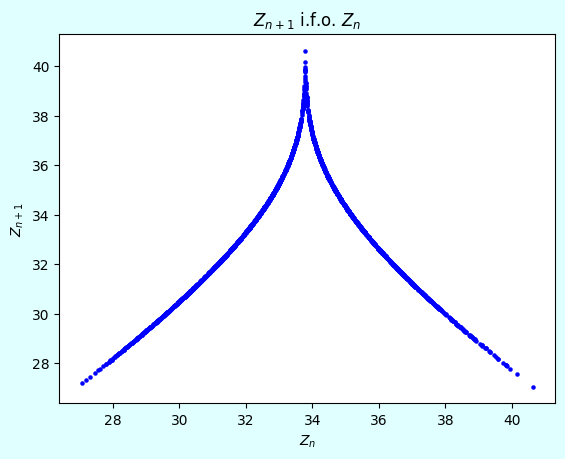

In [49]:
steps = 2000000 #take some more steps so we have enough data
trajx,trajy,trajz = get_trajectory(Xstart,Ystart,Zstart,p)
fig,ax = plt.subplots()
fig.set_facecolor('lightcyan')

ax.set_xlabel('$Z_{n}$')
ax.set_ylabel('$Z_{n+1}$')
ax.set_title('$Z_{n+1}$ i.f.o. $Z_n$')

show_ele_plus_one_ifo_ele(get_Zmax(trajz),ax)

We see a clear connection between a local maximum and its predecessor or successor(when the system has 'settled/stabilised' in the chaotic attractor). We can also deduce some logical thoughts from the graph above: when $Z_n$ is at its highest, the next maximum is very low(because the particle switches wings and finds itself closer to the other equilibrium than it previously was).  

#Bonus Question - Showing that the system is chaotic

We need to show that this system is chaotic and not random in 2 ways. Firstly, we can say that the system is *deterministic*, i.e. given the same starting values, the system will end up in the same state after a certain period of time. And so the system takes *no random input*, implying that the system is not random, but chaotic. The second way in which we can show that the system is chaotic is by plotting the time between two visits at a certain value for X,Y or Z(the system never visits the same point (X,Y,Z) twice, but it does visit the same X-,Y- or Z- value more than once) in function of the time that it previously took to get to that same value again, i.e. plot the phase $I_{n+1}$ in function of the phase $I_n$. If there is a certain correlation(if it's not totally random) between subsequent phases, the system can be deemed chaotic.

In [50]:
p = 28
steps = 50000
Xstart,Ystart,Zstart = 1,1,1

We'll work with $Z$-values. One can find the trajectory of a particle in the $Z$-dimension once again below, where $\rho = 28$.

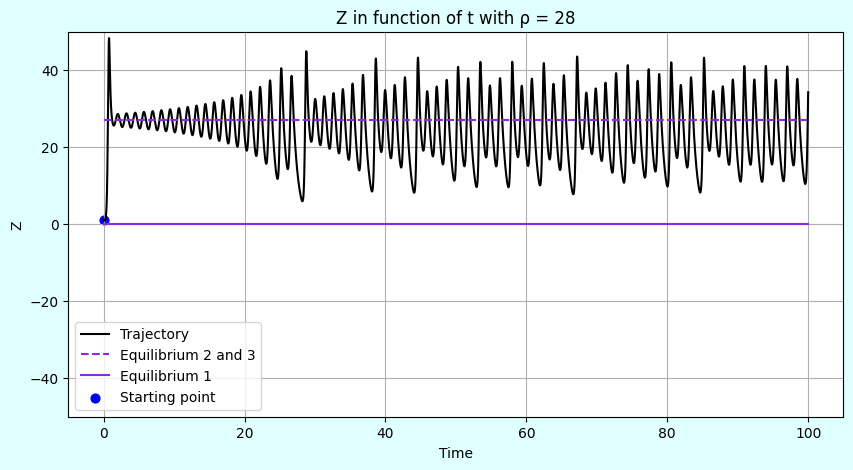

In [51]:
fig,ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('lightcyan')

show_1d_trajectory_ifo_t(Xstart,Ystart,Zstart,p,2,ax)

In [52]:
def get_phases(traj,ref):
    """
    get_phases will, when given a trajectory and a reference value
    which the trajectory oscillates around, return a sequence of the time
    intervals representing the time between the trajectory crossing the
    reference value twice(in an unspecified unit of time)
    """
    if traj[0]>ref:
        under_ref = False
        above_ref = True
    else:
        under_ref = True
        above_ref = False
    phases,previous_t = [],0
    t = np.linspace(0,100,len(traj))
    for i in range(len(traj)):
        if traj[i]>ref and under_ref == True:
            above_ref = True
            under_ref = False
            phases.append(t[i]-previous_t)
            previous_t = t[i]
        if traj[i]<ref and above_ref == True:
            above_ref = False
            under_ref = True
            phases.append(t[i]-previous_t)
            previous_t = t[i]
    return phases[5:] #compensating again for the possible anomalies

'ref' is the reference value here. Whatever we choose for 'ref' is the value for which the particle will be "timed", i.e. the value around which the phases will be measured.

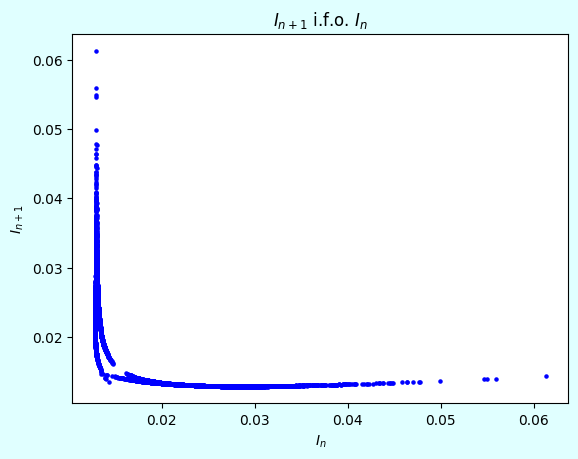

In [53]:
steps = 2000000
trajz = get_trajectory(Xstart,Ystart,Zstart,p)[2]
ref = get_equilibria2(p)[2]

fig,ax = plt.subplots()
fig.set_facecolor('lightcyan')

ax.set_xlabel('$I_{n}$')
ax.set_ylabel('$I_{n+1}$')
ax.set_title('$I_{n+1}$ i.f.o. $I_n$')
show_ele_plus_one_ifo_ele(get_phases(trajz,ref),ax)

It is not hard to observe that there is in fact a correlation between subsequent phases, since the points are not scattered completely random, and so we have found that the system is chaotic for a second time.

A third way, which is somewhat analogous to the previous method, is by showing that a local maximum in $Z$-values is predicted by the previous maximum in $Z$-values(Question 6). In general, any hint of order or predictability distinguishes the system from a random system.

#Extra Visualisation

We'll finalise this assignment with a visualisation of a particle's trajectory in a system governed by the Lorenz equations.

In [54]:
xStart,yStart,zStart = 1,2,4
steps = 1000
dt = 0.01
p = 28
speed = 4
frames = 250

In [55]:
trajx,trajy,trajz = get_trajectory(xStart,yStart,zStart,p)
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
fig.suptitle('Trajectory of a particle where ρ = 28',color = 'white')

ax.set_facecolor('black')
ax.grid(False)
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(5,40)
ax.scatter(0,0,0,color = 'purple', label = 'Saddle-point',s = 20)
ax.scatter(np.sqrt(b*(p-1)),np.sqrt(b*(p-1)),p-1,color = 'gold',s = 20)
ax.scatter(xStart,yStart,zStart,color = 'aqua',s = 20)
ax.scatter(-np.sqrt(b*(p-1)),-np.sqrt(b*(p-1)),p-1,color = 'gold',s = 20)
def animate(frame):
    ax.plot(trajx[:speed*frame],trajy[:speed*frame],trajz[:speed*frame],color = 'aqua',linewidth = 0.5)

ax.view_init(elev=5,azim=-60)
anim = FuncAnimation(fig,animate,frames=frames,interval=50)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Or to truly visualise the 3D aspect of the system, we can make the plot turn:

In [56]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection='3d')
fig.set_facecolor('black')
fig.suptitle('Trajectory of a particle where ρ = 28',color = 'white')

ax.set_facecolor('black')
ax.grid(False)
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(5,40)
ax.scatter(0,0,0,color = 'purple', label = 'Saddle-point',s = 20)
ax.scatter(np.sqrt(b*(p-1)),np.sqrt(b*(p-1)),p-1,color = 'gold',s = 20)
ax.scatter(xStart,yStart,zStart,color = 'aqua',s = 20)
ax.scatter(-np.sqrt(b*(p-1)),-np.sqrt(b*(p-1)),p-1,color = 'gold',s = 20)
def animate(frame):
    ax.plot(trajx[:speed*frame],trajy[:speed*frame],trajz[:speed*frame],color = 'aqua',linewidth = 0.5)
    ax.view_init(elev=5,azim=-frame)

anim = FuncAnimation(fig,animate,frames=frames,interval=50)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()